In [1]:
import sys
from pathlib import Path
prediction_mode_path = Path("../module")
sys.path.append(prediction_mode_path.as_posix())
import predictions_v05 as pred_mode

import pandas as pd
import numpy as np

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### model_type ==
#### RandomForestRegressor

#### DecisionTreeRegressor

#### KNeighborsRegressor

#### SVR

#### linear_model



In [2]:
molecular_descriptors_df = pred_mode.prepare_data('../Data/initial_caffeine.xlsx')

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [00:02<00:00, 20.85it/s]


Data size (rows, columns): (58, 1613)
Data size after first reduction (rows, columns): (58, 1388)
Data size after second reduction (rows, columns): (58, 1137)


In [3]:
without_standarization, train_r2_, test_r2_, hist1, hist2 = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = 0.33, 
                                                                                                    standarization = False, 
                                                                                                    model_type = 'SVR',
                                                                                                    kernel_ = 'linear', #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
                                                                                                    gamma_ = 'auto', #‘scale’, ‘auto’
                                                                                                    train_test_split_ = True, 
                                                                                                    verbose = True)

I am not doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.087615
1                  AATS0are    0.342320
2                    AATS0d    0.109619
3                   AATS0dv    0.266240
4                    AATS0i    0.017757
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.087615                    0.087615
1                  AATS0are    0.342320                    0.342320
2                    AATS0d    0.109619                    0.109619
3                   AATS0dv    0.266240                    0.266240
4                    AATS0i    0.017757                    0.017757
   molecular descriptor name  corr_value  absolute correlation value
1                   AATS0are    0.342320                    0.342320
8            

Target distribution histogram: 
AxesSubplot(0.125,0.11;0.775x0.77)


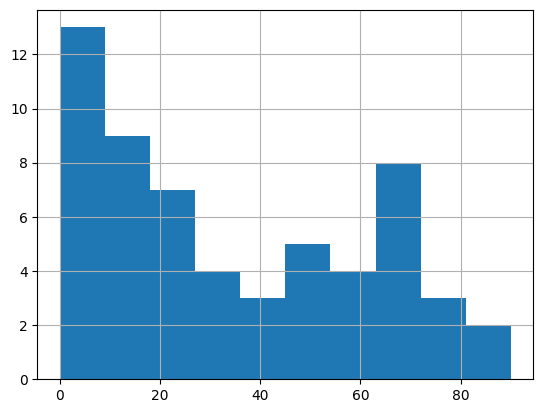

In [4]:
print('Target distribution histogram: ')
print(hist1['Aktywność cytoprotekcyjna [%]'].hist())

In [5]:
print("Number of features (molecular descriptors used): "+ str(len(hist2)))

Number of features (molecular descriptors used): 64


In [6]:
hist2

,molecular descriptor name,corr_value,absolute correlation value
1,AATS0are,0.342320,0.342320
8,AATS0s,0.350131,0.350131
9,AATS0se,0.363989,0.363989
12,AATS1are,0.352396,0.352396
18,AATS1pe,0.338436,0.338436
...,...,...,...
864,SddsN,-0.335349,0.335349
932,SsSH,0.335381,0.335381
936,SssO,0.335389,0.335389
1101,nBondsD,0.369996,0.369996


In [7]:
with_standarization, train_r2, test_r2, hist1_, hist2_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = 0.33, 
                                                                                                    standarization = True, 
                                                                                                    model_type = 'SVR',
                                                                                                    kernel_ = 'linear', #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
                                                                                                    gamma_ = 'auto', #‘scale’, ‘auto’
                                                                                                    train_test_split_ = True, 
                                                                                                    verbose = True)

I am doing standarization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z    0.087615
1                  AATS0are    0.342320
2                    AATS0d    0.109619
3                   AATS0dv    0.266240
4                    AATS0i    0.017757
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z    0.087615                    0.087615
1                  AATS0are    0.342320                    0.342320
2                    AATS0d    0.109619                    0.109619
3                   AATS0dv    0.266240                    0.266240
4                    AATS0i    0.017757                    0.017757
   molecular descriptor name  corr_value  absolute correlation value
1                   AATS0are    0.342320                    0.342320
8                

In [8]:
with_standarization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']])

array([19.99310999, 45.09720037, 42.11720767, 24.24208419, 21.52102538,
       15.71910035,  8.09322422, -0.10044831,  3.98894939,  2.51563567,
       43.30938414, 32.26143201, 30.57391257, 28.43355474, 26.62101784,
       49.90158338, 18.57150943,  8.37956044, 19.62374641, 10.02087756,
       10.10039582, 19.81171407, 10.09534616, 12.79442051, 12.94978898,
        8.39403386,  5.41255689, 56.44432871, 58.38231165, 57.16496074,
       48.04243183, 48.54337782, 47.15341073, 50.08327181, 51.42264429,
       49.68602112, 52.36446651, 53.4322607 , 62.61940355, 77.95737168,
       80.10774974, 65.09462845, 61.05903595, 22.54099777,  9.07654794,
       37.22560246, 39.50226685, 38.86451103, 38.2318246 , 29.89391224,
       29.47872637, 41.32062816, 38.07928674, 19.42681326,  9.33965685,
       24.89882538, 25.88815407, 25.64175203])

In [9]:
xs = r2_score(with_standarization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']]), molecular_descriptors_df['Aktywność cytoprotekcyjna [%]'])
xs

-0.1299567164369131

## Search inside correlation space

In [10]:
step = 0.01
initial_step = 0.3
last_step = 0.48
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
second_list = []
third_list = []
f_list = []
for i in first_list:
    without_standarization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = i, 
                                                                                                    standarization = False, 
                                                                                                    model_type = 'SVR',
                                                                                                    kernel_ = 'poly', #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
                                                                                                    gamma_ = 'auto', #‘scale’, ‘auto’
                                                                                                    train_test_split_ = False, 
                                                                                                    verbose = False)
    second_list.append(train_r2)
    third_list.append(test_r2)
    f_list.append(len(h_))


In [11]:
df_without_standarization = pd.DataFrame(data=first_list, columns=["Correlation threshold"])
df_without_standarization['Training data R^2 score'] = second_list
df_without_standarization['Test data R^2 score'] = third_list
df_without_standarization['Number of features'] = f_list

In [12]:
df_without_standarization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features
0,0.30,0.992289,-4.651191,87
1,0.31,0.990364,-1.447003,75
2,0.32,0.948804,-12.638382,72
3,0.33,0.906818,0.092895,64
4,0.34,0.906347,-1.761791,52
5,0.35,-1.509342,-0.241188,45
6,0.36,-0.902802,-0.978834,38
7,0.37,0.759718,-0.703273,31
8,0.38,0.744803,-12.156841,29
9,0.39,0.560721,-25.556541,23


In [13]:
step = 0.01
initial_step = 0.3
last_step = 0.48
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
second_list = []
third_list = []
f_list = []
for i in first_list:
    without_standarization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = i, 
                                                                                                    standarization = True, 
                                                                                                    model_type = 'SVR',
                                                                                                    kernel_ = 'poly', #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
                                                                                                    gamma_ = 'auto', #‘scale’, ‘auto’
                                                                                                    train_test_split_ = False, 
                                                                                                    verbose = False)
    second_list.append(train_r2)
    third_list.append(test_r2)
    f_list.append(len(h_))

In [14]:
df_with_standarization = pd.DataFrame(data=first_list, columns=["Correlation threshold"])
df_with_standarization['Training data R^2 score'] = second_list
df_with_standarization['Test data R^2 score'] = third_list
df_with_standarization['Number of features'] = f_list

In [15]:
df_with_standarization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features
0,0.30,0.145973,-911.104109,87
1,0.31,0.145238,-849.271224,75
2,0.32,0.137646,-1107.256369,72
3,0.33,0.126163,-1639.707859,64
4,0.34,0.141450,-2300.118301,52
5,0.35,0.145611,-688.041082,45
6,0.36,0.136698,-838.237518,38
7,0.37,0.135477,-186.554963,31
8,0.38,0.115940,-116.441027,29
9,0.39,0.114884,-25.000572,23


## Plots

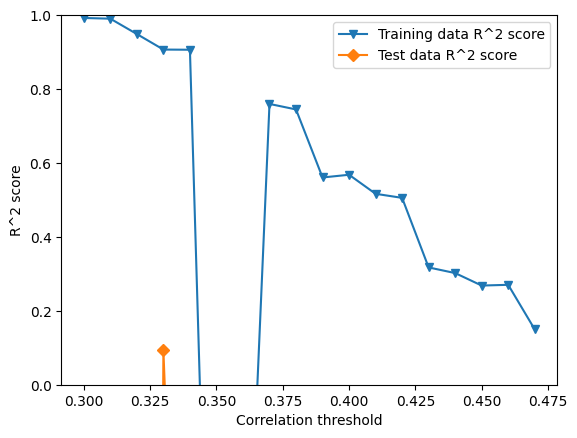

In [16]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Training data R^2 score'], label = "Training data R^2 score", marker='v')
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Test data R^2 score'], label = "Test data R^2 score", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R^2 score')
plt.ylim([0, 1])
plt.show()

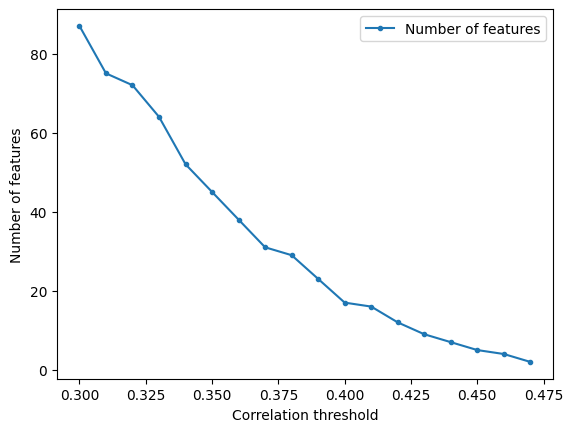

In [17]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

## sqrt(R^2)

In [18]:
df_without_standarization['train R value'] = [np.sqrt(x) for x in df_without_standarization['Training data R^2 score']]

In [19]:
df_without_standarization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,train R value
0,0.30,0.992289,-4.651191,87,0.996137
1,0.31,0.990364,-1.447003,75,0.995170
2,0.32,0.948804,-12.638382,72,0.974066
3,0.33,0.906818,0.092895,64,0.952270
4,0.34,0.906347,-1.761791,52,0.952022
5,0.35,-1.509342,-0.241188,45,NaN
6,0.36,-0.902802,-0.978834,38,NaN
7,0.37,0.759718,-0.703273,31,0.871618
8,0.38,0.744803,-12.156841,29,0.863020
9,0.39,0.560721,-25.556541,23,0.748813


In [20]:
xcz = []
for element in df_without_standarization['Test data R^2 score']:
    x = np.sqrt(element)
    try:
        if x > 0:
            xcz.append(x)
        else:
            xcz.append(0)
    except:
        pass
    

In [21]:
df_without_standarization['test R value'] = xcz

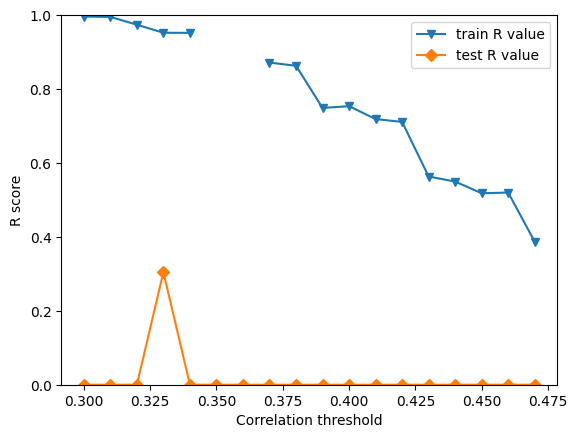

In [22]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['train R value'], label = "train R value", marker='v')
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['test R value'], label = "test R value", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R score')
plt.ylim([0, 1])
plt.show()

In [23]:
step = 0.01
initial_step = 0.3
last_step = 0.48
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
second_list = []
third_list = []
f_list = []
for i in first_list:
    without_standarization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                                                                    correlation_threshold = i, 
                                                                                                    standarization = False, 
                                                                                                    model_type = 'SVR',
                                                                                                    kernel_ = 'poly', #‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
                                                                                                    gamma_ = 'auto', #‘scale’, ‘auto’
                                                                                                    train_test_split_ = True, 
                                                                                                    verbose = False)
    second_list.append(train_r2)
    third_list.append(test_r2)
    f_list.append(len(h_))

    
df_without_standarization = pd.DataFrame(data=first_list, columns=["Correlation threshold"])
df_without_standarization['Training data R^2 score'] = second_list
df_without_standarization['Test data R^2 score'] = third_list
df_without_standarization['Number of features'] = f_list
df_with_standarization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features
0,0.30,0.145973,-911.104109,87
1,0.31,0.145238,-849.271224,75
2,0.32,0.137646,-1107.256369,72
3,0.33,0.126163,-1639.707859,64
4,0.34,0.141450,-2300.118301,52
5,0.35,0.145611,-688.041082,45
6,0.36,0.136698,-838.237518,38
7,0.37,0.135477,-186.554963,31
8,0.38,0.115940,-116.441027,29
9,0.39,0.114884,-25.000572,23


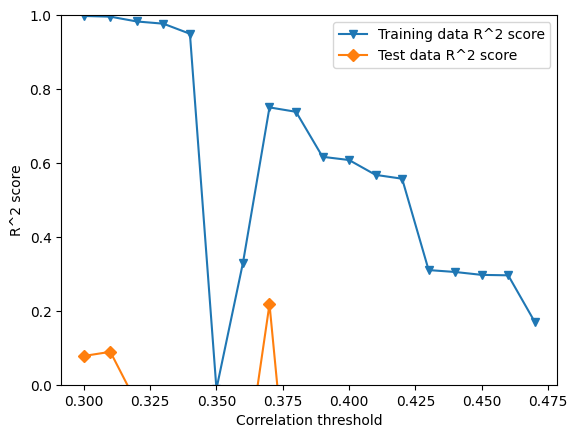

In [24]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Training data R^2 score'], label = "Training data R^2 score", marker='v')
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Test data R^2 score'], label = "Test data R^2 score", marker='D')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('R^2 score')
plt.ylim([0, 1])
plt.show()

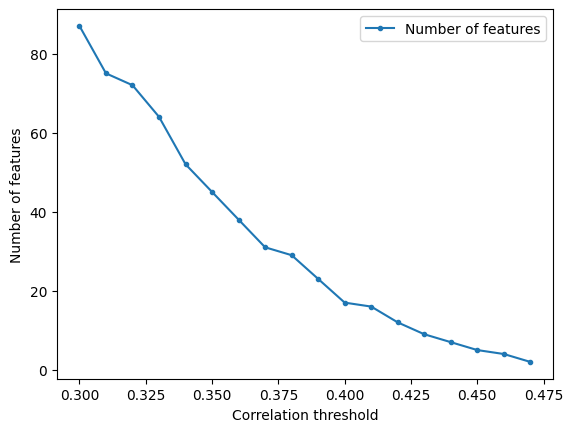

In [25]:
plt.plot(df_without_standarization['Correlation threshold'], df_without_standarization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

## Final model

In [ ]:
stop

In [ ]:
final_model = pred_mode.prepare_data_and_create_model(molecular_descriptors_df = molecular_descriptors_df, 
                                                      correlation_threshold = 0.34, 
                                                      standarization = False, 
                                                      model_type = 'SVR', 
                                                      train_test_split_ = False, 
                                                      verbose = True)

In [ ]:
final_model[0].get_params()

## Predict target feature

In [ ]:
Err

In [ ]:
to_prediction = pred_mode.prepare_data('../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx')

In [ ]:
predicted_activity = final_model[0].predict(to_prediction[final_model[4]['molecular descriptor name']])

In [ ]:
smiles = pd.read_excel('../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx')
smiles = smiles['new_SMILES']
smiles = smiles.to_list()
save_to_df = pd.DataFrame(data=smiles, columns=['SMILES'])

In [ ]:
print(len(smiles))
print(len(predicted_activity))

In [ ]:
save_to_df.head()

In [ ]:
save_to_df['Predicted activity'] = predicted_activity

In [ ]:
save_to_df.head()

In [ ]:
#save_to_df.to_excel('../Data/Predicted_activity.xlsx')